# Optional Lab: Gradient Descent For Linear regression

## Goals
- Find optimal `w` and `b` using batch gradient descent.

## Tools
- NumPy - a data science library
- Matplotlib - a popular plotting library
- plotting functions defined in the lab_utils_uni .py in the local directory

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

## Problem Statement
We'll use the same two data points as before - a house of size 1000 square feet sold for \\$300,00 and a house of size 2000 square feet sold for \\$500,00

In [3]:
# Initialize the data set
x_train = np.array([1.0, 2.0]) # Features, unit 1000 sqft
y_train = np.array([300.0, 500.0]) # Target

### The cost function
We'll implement the cost function $J$ in a vectorized manner.

In [22]:
# Function to calculate the cost
def compute_cost(x, y, w, b):
    """
    Calculates the mean squared error cost function,
    for a linear regression model parameterized by w and b,
    in a vectorized manner.
    Args:
        - x (ndarray (m, )): training set, m features
        - y (ndarray (m, )): n targets
        - w,b (scalars): parameters of the linear regression model
    Returns:
        total_cost (float): The mean squared error cost
    """
    m = x.shape[0]
    total_cost = np.sum(((w * x + b) - y) ** 2) * (1 / (2*m))
    return total_cost


### Gradient Descent
Recall, that gradient descent is the following:

repeat until convergence {

$$w = w - \alpha \frac{\partial}{\partial w}J(w,b)$$
$$b = b - \alpha \frac{\partial}{\partial b}J(w,b)$$
}

Note that simultaneous update is required, that means all partials derivatives must be calculated before any update.

### The Gradient
Let us start step by step, and first we wil define a function `compute_gradient(x,y,w,b)` to compute the partial derivatives.

Recall, that we obtained the following formulas:

$$ \frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^i)-y^i) x^i$$
$$ \frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^i)-y^i) $$

In [21]:
def compute_gradient(x, y, w, b):
    """
    Computes the two partial derivatives for linear regression.
    Args:
        x (ndarray (m,)): Training examples, of length m
        y (ndarray (m,)): Target variables, of length m
        w,b (scalar): model parameter
    Returns:
        dj_dw (scalar): The gradient of the cost w.r.t parameter  w
        dj_db (scalar): The gradient of the cost w.r.t parameter b
    """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb-y[i])
        dj_dw = dj_dw + dj_dw_i
        dj_db = dj_db + dj_db_i
    dj_dw = dj_dw * (1/m)
    dj_db = dj_db * (1/m)
    return dj_dw, dj_db

Here is a vectorized implementation:

In [20]:
def compute_gradient_vectorized(x, y, w, b):
    """
    Computes the two partial derivatives for linear regression,
    in a vectorized manner
    Args:
        x (ndarray (m,)): Training examples, of length m
        y (ndarray (m,)): Target variables, of length m
        w,b (scalar): model parameter
    Returns:
        dj_dw (scalar): The gradient of the cost w.r.t parameter  w
        dj_db (scalar): The gradient of the cost w.r.t parameter b
    """

    # Number of training examples
    m = x.shape[0]
    dj_dw = np.sum((w * x + b - y ) * x ) * (1/m)
    dj_db = np.sum((w * x + b - y ) ) * (1/m)
    return dj_dw, dj_db

We'll use our `compute_gradient` function to plot some partial derivatives of our cost function, relative to some parameters

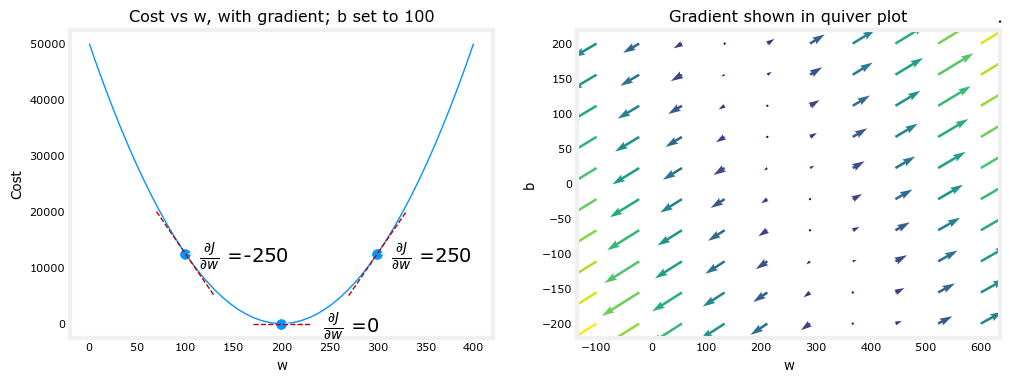

In [23]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

On the right we have a quiver plot which shows the magnitute of the gradient at a point in an arrow format. The gradient points away of the minimum, so moving against the gradient (i.e substracting the derivative term), moves the parameters toward the minimum.

### Implementing Gradient Descent
Now that we can compute the gradient at any time, we can implement the function `gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function)`. This will help us find the optimal values for `w` and `b` along with some history for plotting.

In [28]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Update w,b by taking 
    num_iters steps with learning rate alpha. 
    
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): Target values
        w_in, b_in (scalar): intitial values of model parameter
        alpha (float): learning rate
        num_iters (int): number of iterations to run gradient descent
        cost_function (function): function that produces cost
        gradient_function (function): function that produces gradient
    
    Returns:
        w (scalar): Updated value of parameter w, found by gradient descent
        b (scalar): Updated value of parameter b, found by gradient descent
        J_history (List): History of cost values
        p_history (list): history of parameters (w,b)
    """

    # List to store J, and parameters (w,b) for graphing
    J_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        # Calculate Gradient
        dj_dw, dj_db = compute_gradient(x,y,w,b)

        # Update parameters according to gradient descent
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save history, but prevent resource exaustion
        if i < 100000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        # Print info 10 times overall, or as many if less than 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, {dj_db: 0.3e}  ",
                  f"w: {w:0.3e}, b: {b:0.5e}"
                 )
    return w,b, J_history, p_history

In [32]:
# Intialize parameters
w_init = 0
b_init = 0
# Gradient Descent settings
num_iters = 10000
alpha = 1.0e-2
# Call gradient descent
w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, -4.000e+02   w: 6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01,  6.007e-01   w: 1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01,  2.895e-01   w: 1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02,  1.396e-01   w: 1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02,  6.727e-02   w: 1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02,  3.243e-02   w: 1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03,  1.563e-02   w: 1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03,  7.535e-03   w: 1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03,  3.632e-03   w: 2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03,  1.751e-03   w: 2.000e+02, b: 1.00024e+02
(w,b) found by gradient descent (199.9929, 100.0116)


Some characteristics:
- cost decrease rapidly at first then more slowly later later
- same for dj_dw and dj_db
- As we near the minimum, or 'bottom of the bowl', the progress is slower

### Plot progress of gradient descent
We can plot the cost vs. iterations of gradient descent. Cost should always decrease in successfull runs. The change is so abrupt and fast initially, so we'll plot the initial descent (first 100 iterations) on a different scale then the final descent.

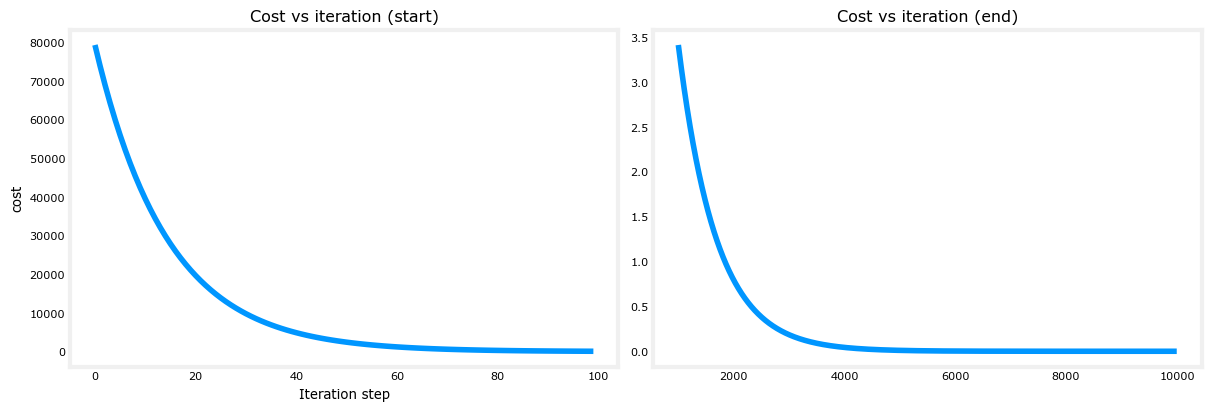

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax1.set_title("Cost vs iteration (start)")
ax1.set_xlabel("Iteration step")
ax1.set_ylabel("cost")
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax2.set_title("Cost vs iteration (end)")
ax1.set_xlabel("Iteration step")
ax1.set_ylabel("cost")
plt.show()

### Predictions
Now that we have found optimal `w` and `b` using gradient descent, you can use the model to predict housing prices.

In [48]:
print(f"1000 sqft house prediction {w_final * 1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final * 1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final * 2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


### More Plotting
This is a contour plot of the cost J(w,b) vs both `w` and `b`.

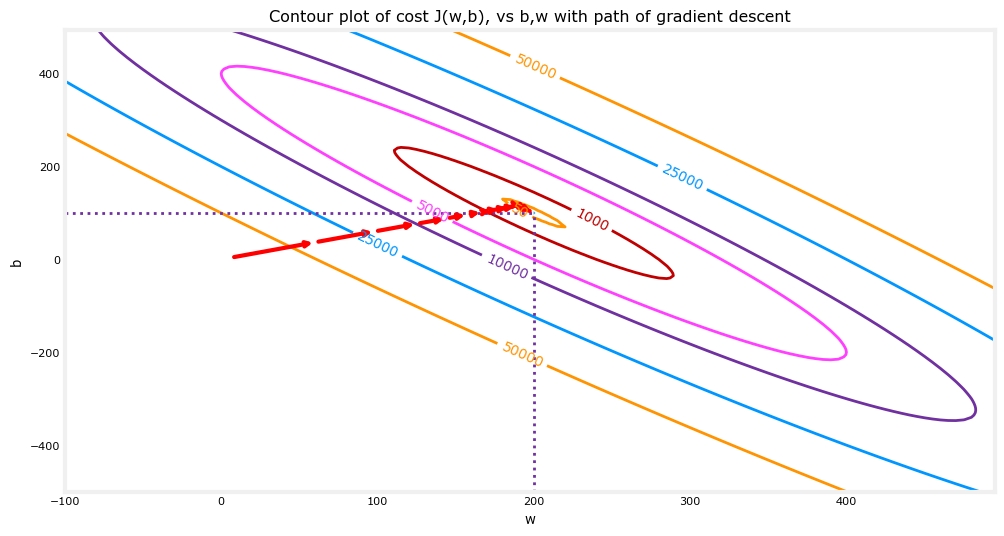

In [49]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plt_contour_wgrad(x_train, y_train, p_history, ax)

**Zooming in** we can see the final steps, notice how each step shrink as we are reaching the minimum.

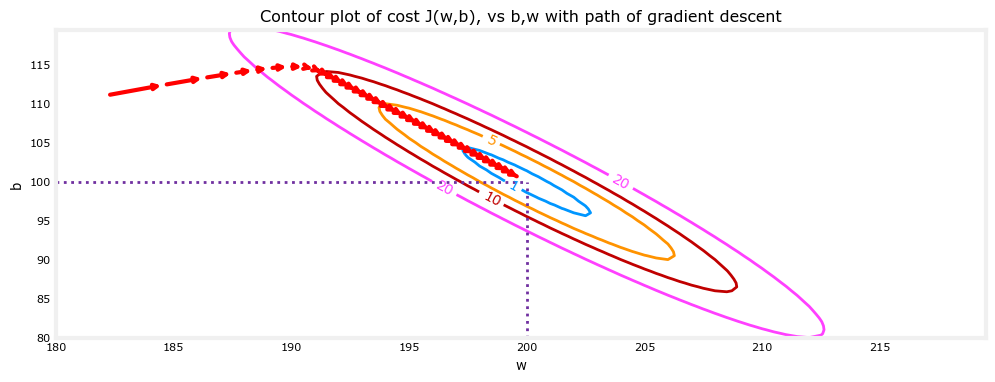

In [55]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
plt_contour_wgrad(x_train, y_train, p_history, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5], contours=[1,5,10,20], resolution=0.5)


### High learning rate
If the learning rate too high, gradient descent might overshoot and diverge. See the following:

In [62]:
# Initialize parameters
w_init = 0
b_init = 0
# set alpha to a high value
num_iters = 10
alpha = 8.0e-1
# execute gradient descent with high alpha
w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, -4.000e+02   w: 5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03,  7.000e+02   w: -3.840e+02, b: -2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, -1.216e+03   w: 1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03,  2.121e+03   w: -1.551e+03, b: -9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, -3.691e+03   w: 3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04,  6.431e+03   w: -5.095e+03, b: -3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, -1.120e+04   w: 9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04,  1.950e+04   w: -1.584e+04, b: -9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, -3.397e+04   w: 2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04,  5.916e+04   w: -4.845e+04, b: -2.99567e+04


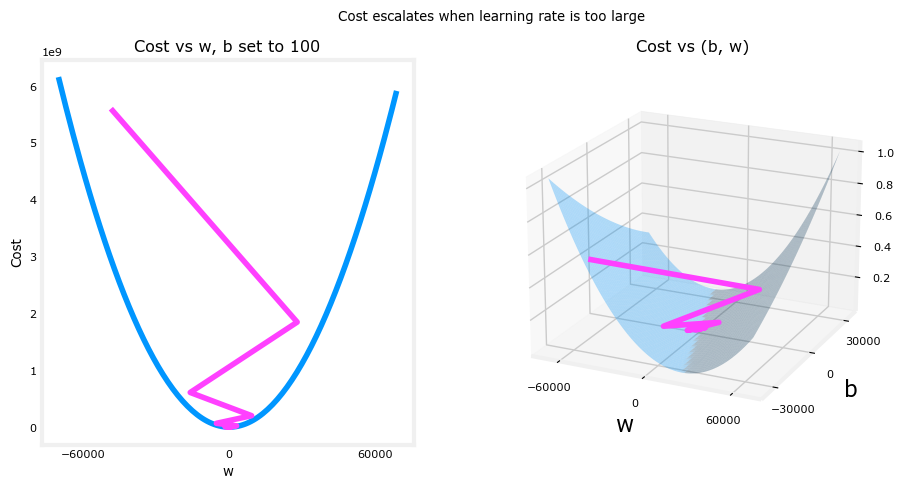

In [64]:
plt_divergence(p_history, J_history, x_train, y_train)
plt.show()